# Important Concept
- Word2Vec is deep learning technique used to convert word into the vector
- There are several other technique like tf-idf approach, count vectorizers approach  as well, but Word2Vec is deep learning technique.
- In word2vec, it learns word vector which means their will a vector of every word, that vector is going to be dependent upon the context in which word is used.

**Cosine Similarity** :
- Cos(x, y) = x . y / ||x|| * ||y|| 
- or
- $\mbox{Cosine Similarity} = \frac{\sum_{i=1}^{n}{x_{i} y_{i}}} {\sqrt{\sum_{i=1}^{n}{x_{i}^{2}}} \sqrt{\sum_{i=1}^{n}{y_{i}^{2}}}}$
- It is used to find out similarity between two vectors

## Word2Vec Model
- Word2Vec Google's Pretrained Model
- Contains vector representations of 50 billion words
- Words which are similar in context have similar vectors
- Distance/Similarity between two words can be measured using Cosine Distance

## Applications
- Text Similarity
- Language Translation
- Finding Odd Words
- Word Analogies


## Word Embeddings
- Word embeddings are numerical representation of words, in the form of vectors.
- Word2Vec Model represents each word as 300 Dimensional Vector.
https://radimrehurek.com/gensim/models/word2vec.html

### Research Papers:
- https://arxiv.org/pdf/1301.3781.pdf
- https://arxiv.org/abs/1310.4546

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------

**https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa**

-----------------------------------------------------------------------------------------


In [1]:
import gensim
from pathlib import Path

In [2]:
p = Path('./dataset')

In [3]:
z = p.glob("./*")

In [4]:
z

<generator object Path.glob at 0x000001E20AA1CDD0>

In [5]:
list(z)

[WindowsPath('dataset/GoogleNews-vectors-negative300.bin')]

**KeyedVectors: Its an object essentially contains the mapping between and embeddings. After training, it can be used directly to query embeddings in various ways**

In [6]:
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
word_vectors = KeyedVectors.load_word2vec_format('dataset/GoogleNews-vectors-negative300.bin', binary=True)

In [8]:
v_apple = word_vectors['apple']
word_vectors['apple'].shape #300 

(300,)

In [9]:
v_apple

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [10]:
v_mango = word_vectors['mango']
v_mango,v_mango.shape

(array([-2.71484375e-01,  9.22851562e-02,  8.78906250e-02,  2.39257812e-01,
         8.97216797e-03,  1.36718750e-01,  5.98144531e-02, -2.53906250e-01,
        -1.25000000e-01,  1.62109375e-01,  1.59179688e-01, -1.65039062e-01,
        -6.83593750e-02,  1.96289062e-01, -1.64062500e-01,  2.22656250e-01,
        -1.09375000e-01, -2.61230469e-02, -2.24609375e-01,  1.36718750e-01,
        -2.48046875e-01,  1.09863281e-02,  1.17187500e-01, -7.08007812e-02,
         3.14941406e-02, -1.01074219e-01, -6.39648438e-02,  5.73730469e-02,
        -2.30712891e-02,  1.10839844e-01, -2.22656250e-01, -9.37500000e-02,
        -9.27734375e-02,  1.45507812e-01, -2.29492188e-01, -4.61425781e-02,
        -1.50390625e-01, -3.30078125e-01,  2.05078125e-01, -1.37695312e-01,
        -1.80664062e-02, -7.61718750e-02, -5.85937500e-02,  2.46093750e-01,
        -2.42187500e-01, -3.16406250e-01, -1.57226562e-01, -1.00585938e-01,
         1.32812500e-01,  1.58203125e-01, -1.02539062e-02,  1.97265625e-01,
         1.3

In [11]:
# finding similarity btw apple and mango using cosine_similarity
sim = cosine_similarity([v_apple],[v_mango])
sim

array([[0.57518554]], dtype=float32)

In [12]:
import numpy as np
val = np.round(sim[0][0],2)*100
print('%d percent similarity'%val) # Apple != apple in word2vec

57 percent similarity


### Finding Odd One Out
**Working of oddOneOut function**
- Compute vector(say v1,v2,v3..) of every word in list passed as parameter 
- the make average vector with sum(v1+v2+v3)/number of words in vector (3 for above)
- or just find mean of all 
- cosine Similarity between every word from average vector and word vector
- word with minimum cosine similarity will be the odd one

In [13]:
def oddOneOut(words):
    # returns odd word out from the list
    # word with minimum cosine similarity will be the odd one.
    all_words_vectors = [word_vectors[w] for w in words]
   # print(len(all_words_vectors[0]))
#     print(len(all_words_vectors))
#     print(all_words_vectors[0])
    avg_vector = np.mean(all_words_vectors, axis = 0)
    #print((avg_vector))
    
    #print(avg_vector)
   #iterate over every word and find similarity
    odd_one_out = None
    min_similarity = 1.0 # very high value
    
    for w in words:
        sim = cosine_similarity([word_vectors[w]], [avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w
        print("Similarity btw %s and avg vector is %.2f"%(w, sim))
    return odd_one_out

In [15]:
input_1 = ['apple', 'mango', 'juice', 'party', 'orange']
input_2 = ['music','dance', 'sleep', 'dancer', 'food']
input_3 = ['match', 'player', 'football','cricket', 'dancer']
input_4 = ['india', 'paris', 'russia','france', 'germany']

In [16]:
print(oddOneOut(input_1))
print()
print(oddOneOut(input_2))
print()
print(oddOneOut(input_3))
print()
print(oddOneOut(input_4))

Similarity btw apple and avg vector is 0.78
Similarity btw mango and avg vector is 0.76
Similarity btw juice and avg vector is 0.71
Similarity btw party and avg vector is 0.36
Similarity btw orange and avg vector is 0.65
party

Similarity btw music and avg vector is 0.66
Similarity btw dance and avg vector is 0.81
Similarity btw sleep and avg vector is 0.51
Similarity btw dancer and avg vector is 0.72
Similarity btw food and avg vector is 0.52
sleep

Similarity btw match and avg vector is 0.58
Similarity btw player and avg vector is 0.68
Similarity btw football and avg vector is 0.72
Similarity btw cricket and avg vector is 0.70
Similarity btw dancer and avg vector is 0.53
dancer

Similarity btw india and avg vector is 0.81
Similarity btw paris and avg vector is 0.75
Similarity btw russia and avg vector is 0.79
Similarity btw france and avg vector is 0.81
Similarity btw germany and avg vector is 0.84
paris


### Word Analogies Task
**In the word analogy task, we complete the sentence "a is to b as c is to __". An example is 'man is to woman as king is to queen' . In detail, we are trying to find a word d, such that the associated word vectors ea,eb,ec,ed are related in the following manner: eb−ea≈ed−ec. We will measure the similarity between eb−ea and ed−ec using cosine similarity.**

- **a $\rightarrow$ b : c $\rightarrow$ ?**

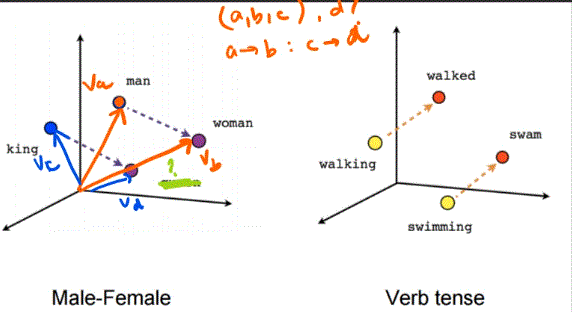

- **if there is similarity btw man and woman then the distance(Vb-Va) btw them will be same for king and queen (Vd-Vc)**
- we need to find out the vector such that **|Vb - Va| ~ |Vd - Vc|**
- **Find:- (Vb - Va + Vc = Vd)**

In [17]:
word_vectors.vocab, len(word_vectors.vocab) #3000000

({'</s>': <gensim.models.keyedvectors.Vocab at 0x1e20aa457c0>,
  'in': <gensim.models.keyedvectors.Vocab at 0x1e20aa65160>,
  'for': <gensim.models.keyedvectors.Vocab at 0x1e20aa65280>,
  'that': <gensim.models.keyedvectors.Vocab at 0x1e20aa65220>,
  'is': <gensim.models.keyedvectors.Vocab at 0x1e20af52040>,
  'on': <gensim.models.keyedvectors.Vocab at 0x1e20af520d0>,
  '##': <gensim.models.keyedvectors.Vocab at 0x1e20af52130>,
  'The': <gensim.models.keyedvectors.Vocab at 0x1e20af52190>,
  'with': <gensim.models.keyedvectors.Vocab at 0x1e20af521f0>,
  'said': <gensim.models.keyedvectors.Vocab at 0x1e20af52250>,
  'was': <gensim.models.keyedvectors.Vocab at 0x1e20af522b0>,
  'the': <gensim.models.keyedvectors.Vocab at 0x1e20af52310>,
  'at': <gensim.models.keyedvectors.Vocab at 0x1e20af52370>,
  'not': <gensim.models.keyedvectors.Vocab at 0x1e20af523d0>,
  'as': <gensim.models.keyedvectors.Vocab at 0x1e20af52430>,
  'it': <gensim.models.keyedvectors.Vocab at 0x1e20af52490>,
  'be': <ge

In [18]:
def predict_word(a,b,c,word_vectors):
    a,b,c = a.lower(), b.lower(), c.lower()
    
    max_similarity = -10000
    d = None
    
    words = word_vectors.vocab.keys()
    # extract vector for each word
    wa, wb, wc = word_vectors[a], word_vectors[b], word_vectors[c]
    
    # find d s.t similarity(|b-a|, |d-c|) should be max
    # d is unknown, for d as every word in vocab, then see which word maximizes the similarity
    
    for w in words:
        if w in [a,b,c]:
            continue
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
            
    return d

In [19]:
#predict_word('man', 'woman', 'prince', word_vectors)

In [20]:
# import time
# start = time.time()
# ws = ('man', 'code', 'woman')
# predict(*ws, word_vectors)
# end = time.time()
# print(end - start)

### Using the Most Similar Method
- faster execution time

In [21]:
import time
start = time.time()
print(word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
end = time.time()
print(end-start)

[('queen', 0.7118192911148071)]
36.982269525527954


### Training Our Own Word2Vec Model
- Word2Vec model can learn embeddings from any text corpus!
    - Continuous Bag of Words Model
    - Skip Gram Model

In [37]:
from nltk.corpus import stopwords
stopw  = set(stopwords.words('english'))

In [40]:
import nltk
from nltk.corpus import stopwords

def readFile(file): 
    f = open(file,'r',encoding='utf-8')
    text = f.read()
    sentences = nltk.sent_tokenize(text)
    
    data = []
    for sent in sentences:
        words =  nltk.word_tokenize(sent)
        words = [w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
        
    return data

text = readFile('bwood.txt')

In [26]:
# create model

In [41]:

print(text)

[['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018'], ['the', 'deepveer', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple'], ['from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'ranveer', 'wedding', 'style', 'file'], ['not', 'ambanis', 'deepika', 'ranveer', 'priyanka', 'nick'], ['man', 'proves', 'wedding', 'the', 'year', 'this', 'year', 'year', 'big', 'fat', 'lavish', 'extravagant', 'weddings'], ['from', 'isha', 'ambani', 'anand', 'piramal', 'deepika', 'padukone', 'ranveer', 'singh', 'priyanka', 'chopra', 'nick', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', '2018', 'saw', 'many', 'grand', 'weddings'], ['but', 'nothing', 'beats', 'man', 'wedding', 'the', 'year', 'award', 'social', 'media'], ['the', 'wedding', 'season', 'year', 'kicked', 'deepika', 'padukone', 'ranveer', 'singh', 'flew', 'lake', 'como', 't

In [52]:
from gensim.models import Word2Vec
model = Word2Vec(text,size = 300, window=10, min_count = 1)

print(model)
words = list(model.wv.vocab)

Word2Vec(vocab=915, size=300, alpha=0.025)


In [53]:
print(words)

['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018', 'the', 'deepveer', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple', 'from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'style', 'file', 'not', 'ambanis', 'priyanka', 'nick', 'man', 'proves', 'year', 'this', 'big', 'fat', 'lavish', 'extravagant', 'weddings', 'isha', 'ambani', 'anand', 'piramal', 'chopra', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', 'saw', 'many', 'grand', 'but', 'nothing', 'beats', 'award', 'social', 'media', 'season', 'kicked', 'flew', 'lake', 'como', 'tie', 'knot', 'days', 'november', 'they', 'several', 'bengaluru', 'mumbai', 'even', 'continued', 'tied', 'american', 'singer', 'jodhpur', 'december', 'yet', 'another', 'spread', 'week', 'hosted', 'delhi', 'host', 'party', 'los', 'angeles', 'time', 'could', 'move', 'mukesh', 'nita', 'dau

In [57]:
actors = ["ranveer","deepika","padukone","singh","nick","jonas","chopra","priyanka","virat","anushka","ginni"]
def predict_actor(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    max_similarity = -100 
    d = None
    words = actors
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    #to find d s.t similarity(|b-a|,|d-c|) should be max   
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
    return d
    

### Model testing

In [60]:
triad = ("nick","priyanka","virat")
predict_actor(*triad,model.wv)

'singh'

In [61]:
triad = ("priyanka","jonas","nick")
predict_actor(*triad,model.wv)

'padukone'